In [7]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#! pip install tensorflow


In [9]:
#! pip install textblob

In [10]:
#! pip install wordcloud

In [11]:
df= pd.read_csv('vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08-04-2009 17:52,405,1692,3247,False,20-12-2020 06:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21-09-2009 15:27,834,666,178,False,13-12-2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25-06-2020 23:30,10,88,155,False,12-12-2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10-09-2008 11:28,49165,3933,21853,True,12-12-2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,23-04-2020 17:58,152,580,1473,False,12-12-2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# EDA

In [12]:
df['date'] = pd.to_datetime(df['date']).dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                228207 non-null  float64
 1   user_name         228205 non-null  object 
 2   user_location     161296 non-null  object 
 3   user_description  211189 non-null  object 
 4   user_created      228207 non-null  object 
 5   user_followers    228207 non-null  int64  
 6   user_friends      228207 non-null  int64  
 7   user_favourites   228207 non-null  int64  
 8   user_verified     228207 non-null  bool   
 9   date              228207 non-null  object 
 10  text              228207 non-null  object 
 11  hashtags          178504 non-null  object 
 12  source            228088 non-null  object 
 13  retweets          228207 non-null  int64  
 14  favorites         228207 non-null  int64  
 15  is_retweet        228207 non-null  bool   
dtypes: bool(2), float64(

In [13]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [14]:
# fill null with 'Notags'
df['hashtags'] = df['hashtags'].fillna('Notags')
# cleaning and adaptive for analysis
df['hashtags'] = [re.sub("[(\[\')|(\]\')|\s]", '', tags) for tags in df['hashtags']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                228207 non-null  float64
 1   user_name         228205 non-null  object 
 2   user_location     161296 non-null  object 
 3   user_description  211189 non-null  object 
 4   user_created      228207 non-null  object 
 5   user_followers    228207 non-null  int64  
 6   user_friends      228207 non-null  int64  
 7   user_favourites   228207 non-null  int64  
 8   user_verified     228207 non-null  bool   
 9   date              228207 non-null  object 
 10  text              228207 non-null  object 
 11  hashtags          228207 non-null  object 
 12  source            228088 non-null  object 
 13  retweets          228207 non-null  int64  
 14  favorites         228207 non-null  int64  
 15  is_retweet        228207 non-null  bool   
dtypes: bool(2), float64(

In [15]:
df.shape


(228207, 16)

In [16]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337730e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408130e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428690e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463250e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


In [17]:
df["text"] = df["text"].str.lower()
df["text"]

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [18]:
# removing urls
df["text"] = df["text"].apply(lambda x:re.sub(r"http\S+", "", x))
df["text"]

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [19]:
df["text"] = df["text"].apply(lambda x:re.sub(r"\s+[a-zA-Z]\s+", '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r"\s+", " ", x))
df["text"]

0         same folks said daikon paste could treatcytoki...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we needvaccine @borisj...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [20]:
ps = PorterStemmer()

In [21]:
df["text"] = [ps.stem(word) for word in df["text"] if not  word in set(stopwords.words('english'))] # use set for larger text

In [22]:
df["text"]

0         same folks said daikon paste could treatcytoki...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we needvaccine @borisj...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [23]:
# Stopword Removal
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df["text"]

0         folks said daikon paste could treatcytokine st...
1         world wrong side history year, hopefully, bigg...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts immutable, senator, even ethically sturd...
4         explain needvaccine @borisjohnson @matthancock...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    promote vaccines leaving stronger @russia vacc...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [24]:
textt = " ".join(review for review in df.text)

In [25]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [26]:
df['subjectivity'] = df['text'].apply(get_subjectivity)
df['polarity'] = df['text'].apply(get_polarity)
df['sentiment'] = df['polarity'].apply(get_sentiment)
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity,sentiment
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08-04-2009 17:52,405,1692,3247,False,2020-12-20,folks said daikon paste could treatcytokine st...,PfizerBioNTech,Twitter for Android,0,0,False,0.000000,0.0,Neutral
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21-09-2009 15:27,834,666,178,False,2020-12-13,"world wrong side history year, hopefully, bigg...",Notags,Twitter Web App,1,1,False,0.900000,-0.5,Negative
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25-06-2020 23:30,10,88,155,False,2020-12-12,#coronavirus #sputnikv #astrazeneca #pfizerbio...,"coronavirus,SputnikV,AstraZeneca,PfizerBioNTec...",Twitter for Android,0,0,False,0.033333,0.0,Neutral
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10-09-2008 11:28,49165,3933,21853,True,2020-12-12,"facts immutable, senator, even ethically sturd...",Notags,Twitter Web App,446,2129,False,0.550000,0.1,Positive
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,23-04-2020 17:58,152,580,1473,False,2020-12-12,explain needvaccine @borisjohnson @matthancock...,"whereareallthesickpeople,PfizerBioNTech",Twitter for iPhone,0,0,False,0.000000,0.0,Neutral


In [27]:
# Commonly used words
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('#covaxin', 53346),
 ('#moderna', 38190),
 ('vaccine', 31750),
 ('dose', 29122),
 ('-', 28021),
 ('slots', 23770),
 ('#covid19', 16801),
 ('covaxin', 16152),
 ('#bbmp', 14184),
 ('18', 13557)]

In [28]:
sentiment_counts = df["sentiment"].value_counts()

In [29]:
sentiment_counts

Neutral     134537
Positive     72638
Negative     21032
Name: sentiment, dtype: int64

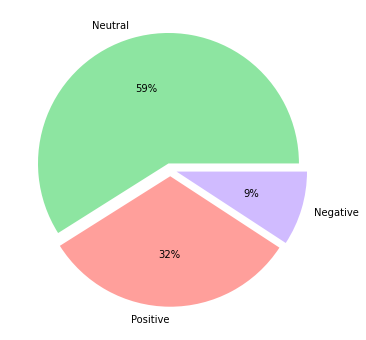

In [30]:
# Create a pie chart by airline %
labels = ['Neutral', "Positive", "Negative"]
plt.subplots(figsize=[10,6])
colors = sns.color_palette('pastel')[2:5]
plt.pie(sentiment_counts, labels= labels, colors= colors,autopct='%.0f%%', explode=[0.05]*3)
plt.show()

The above pie chart illustrates the sentiment of users in three diffrent forms. The Neutral emotion percentage is higher that is 59% whereas there are very less users with negeative sentiments with 9% followed by positive having 32%.



In [31]:
df['user_verified'].unique()

array([False,  True])

In [32]:
# Create a bar chart by airline and airline sentiment
listOfAirlines = df['user_verified'].unique()
neutralCount = []
positiveCount = []
negativeCount = []
totalCount = []

for airline in listOfAirlines:
    neuC = df.query("user_verified == @airline and sentiment == 'Neutral'")['sentiment'].count()
    posC = df.query("user_verified == @airline and sentiment == 'Positive'")['sentiment'].count()
    negC = df.query("user_verified == @airline and sentiment == 'Negative'")['sentiment'].count()
    tot = neuC + posC + negC
    neutralCount.append(neuC)
    positiveCount.append(posC)
    negativeCount.append(negC)
    totalCount.append(tot)

df2 = pd.DataFrame(index=listOfAirlines);
df2['Neutral Count'] = neutralCount
df2['Positive Count'] = positiveCount
df2['Negative Count'] = negativeCount
df2

,Neutral Count,Positive Count,Negative Count
False,123224,66415,19366
True,11313,6223,1666


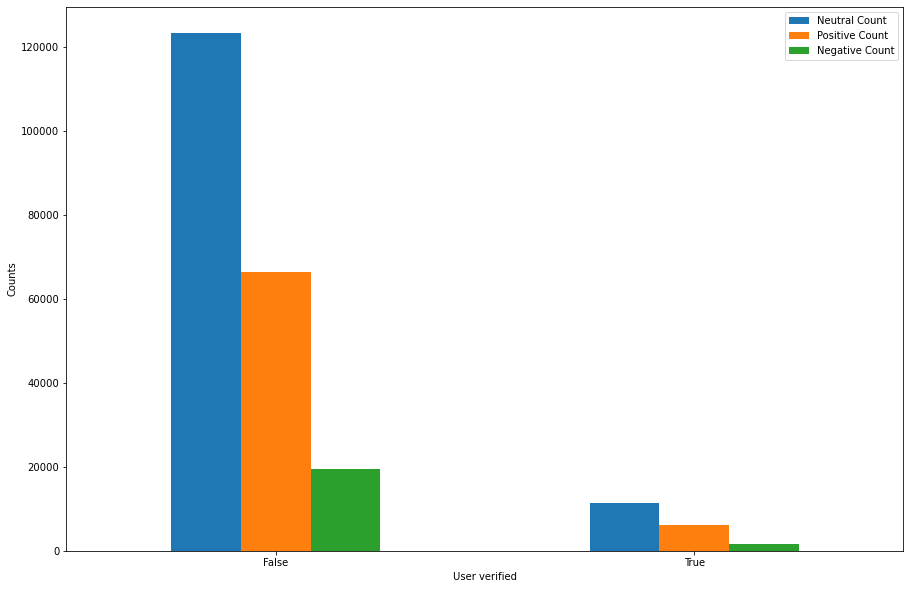

In [33]:
plt2 = df2.plot.bar(rot=0, figsize=(15,10))

# Add title and axis names
plt.xlabel('User verified')
plt.ylabel('Counts')
 
# Show graphic
plt.show()

The above bar chart describes that users verified with neutral count have hgher number of false that is nearly 120000 while with the same sentiment the number of true verified users are less than 20000. Moreover, the user having positive sentiment have resulted false nearly upto 65000 followed by true verification with having less than 20000. While users with negeative sentiment has been verified below 20000 on the both side.

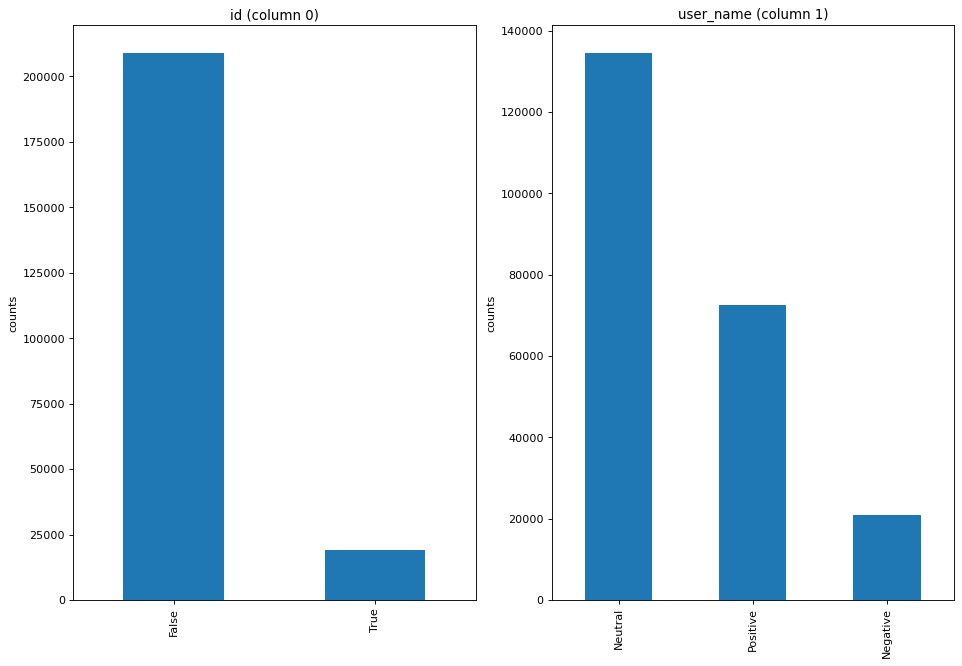

In [34]:
# Distribution graphs (histogram/bar graph) of column data

nunique = df.nunique()
df1 = df[[col for col in df if nunique[col] > 1 and nunique[col] < 150]] # For displaying purposes, pick columns that have between 1 and 50 unique values
nRow, nCol = df.shape
columnNames = list(df)
nGraphRow = (nCol + 8 - 1) / 8
plt.figure(num = None, figsize = (6 * 8, 8 * 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
for i in range(min(nCol, 2)):
    plt.subplot(8, 8, i + 1)
    columnDf = df1.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation = 90)
    plt.title(f'{columnNames[i]} (column {i})')
plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()

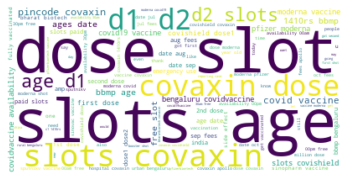

In [35]:
stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [36]:
tokenizer = Tokenizer(5000)
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])
tweets = pad_sequences(sequences, maxlen=200)
print(tweets)

[[   0    0    0 ...  142  284   58]
 [   0    0    0 ...   44 2243 2632]
 [   0    0    0 ...  200   14  128]
 ...
 [   0    0    0 ...    4   23  209]
 [   0    0    0 ...  117    2   17]
 [   0    0    0 ...   23   41   22]]


In [37]:
y = pd.get_dummies(df["sentiment"])

In [38]:
y.shape

(228207, 3)

In [39]:
X = tweets
tweets.shape

(228207, 200)

In [40]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# LSTM

In [41]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [42]:
model1 = Sequential()
model1.add(layers.Embedding(5000, 20))
model1.add(layers.LSTM(150,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=3,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/3
5349/5349 [==============================] - ETA: 0s - loss: 0.3292 - accuracy: 0.8932
Epoch 00001: val_accuracy improved from -inf to 0.94849, saving model to best_model1.hdf5
5349/5349 [==============================] - 1561s 291ms/step - loss: 0.3292 - accuracy: 0.8932 - val_loss: 0.2044 - val_accuracy: 0.9485
Epoch 2/3
5349/5349 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9465
Epoch 00002: val_accuracy improved from 0.94849 to 0.95159, saving model to best_model1.hdf5
5349/5349 [==============================] - 1537s 287ms/step - loss: 0.2049 - accuracy: 0.9465 - val_loss: 0.1894 - val_accuracy: 0.9516
Epoch 3/3
5349/5349 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9491
Epoch 00003: val_accuracy improved from 0.95159 to 0.95355, saving model to best_model1.hdf5
5349/5349 [==============================] - 1587s 297ms/step - loss: 0.1959 - accuracy: 0.9491 - val_loss: 0.1843 - val_accuracy: 0.9536


In [43]:
best_model = keras.models.load_model("best_model1.hdf5")

In [44]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

1783/1783 - 153s - loss: 0.1843 - accuracy: 0.9536 - 153s/epoch - 86ms/step
Model accuracy:  0.953551173210144


In [45]:
y_preds = best_model.predict(X_test)

In [46]:
y_test = y_test.to_numpy()
np.argmax(y_test, axis= 1)

array([2, 2, 1, ..., 0, 2, 1], dtype=int64)

<AxesSubplot:>

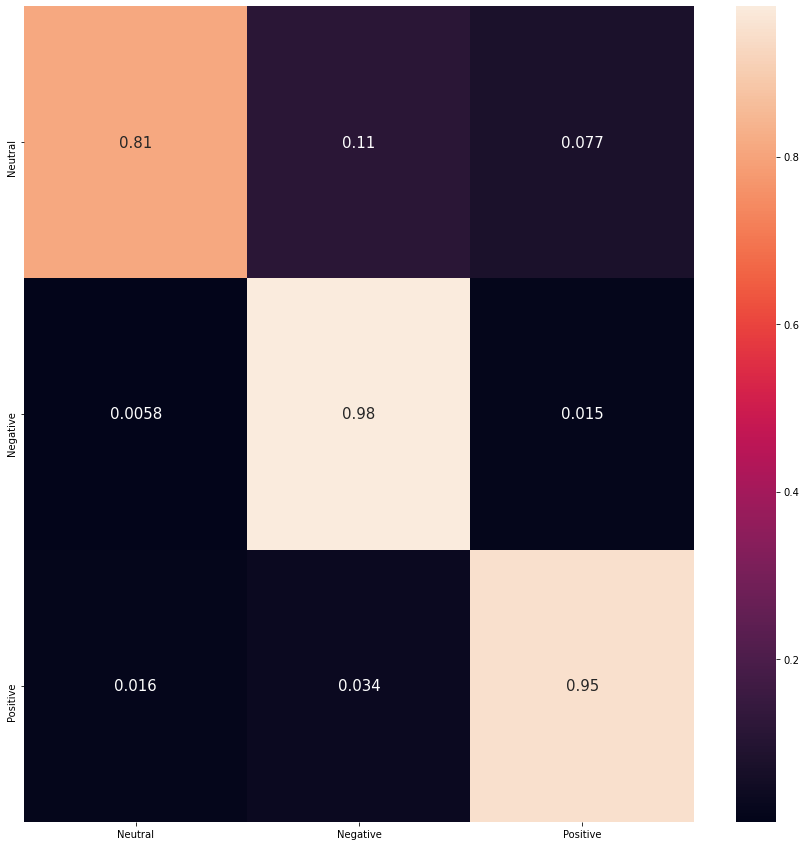

In [47]:
cm_matrix = confusion_matrix(np.argmax(y_test, axis= 1), np.around(y_preds, decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(cm_matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})